In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Students_Dataset.csv')
df.head(5)

,Name,Age,Group,Score
0,Alice,20,NaN,85.0
1,Bob,22,B,78.0
2,Charlie,21,A,NaN
3,Diana,23,B,92.0
4,Eve,22,A,88.0


In [ ]:
print(df.info())
print(df.describe())
score_avarage=df['Score'].mean()
print(score_avarage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    10 non-null     object 
 1   Age     10 non-null     int64  
 2   Group   8 non-null      object 
 3   Score   8 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes
None
             Age      Score
count  10.000000   8.000000
mean   21.600000  78.375000
std     1.429841  14.647647
min    20.000000  55.000000
25%    20.250000  70.500000
50%    21.500000  81.500000
75%    22.750000  89.000000
max    24.000000  95.000000
78.375


In [ ]:
print(len(df.loc[df['Group']=='B'].count()))
print(len(df.loc[df['Group']=='A'].count()))
df_groupA=df.loc[df['Group']=='A']
df_groupB=df.loc[df['Group']=='B']
print(df_groupA['Score'].mean())
print(df_groupB['Score'].mean())

4
4
91.5
85.0


In [ ]:
df_clever=df.loc[df['Score']>80]
df_clever_sorted=df_clever.sort_values(by='Score',ascending=False)

print('Лучшие учащяеся' )
print(df_clever_sorted)
print()
df_clever_sorted_oldest=df_clever_sorted.sort_values(by='Age',ascending=False).iloc[0]
print('Самый старший ученик ')
print(df_clever_sorted_oldest)
print()
print('Самый младший ученик')
df_clever_sorted_youngest=df_clever_sorted.sort_values(by='Age',ascending=True).iloc[0]
print(df_clever_sorted_youngest)


Лучшие учащяеся
    Name  Age Group  Score
9   Jack   23     A   95.0
3  Diana   23     B   92.0
4    Eve   22     A   88.0
0  Alice   20   NaN   85.0

Самый старший ученик 
Name     Jack
Age        23
Group       A
Score    95.0
Name: 9, dtype: object

Самый младший ученик
Name     Alice
Age         20
Group      NaN
Score     85.0
Name: 0, dtype: object


In [ ]:
score_mean=df['Score'].mean()
df['Score'].fillna(score_mean,inplace=True)
df_clean = df.dropna().reset_index().drop(columns=['index'], inplace=False)
print(df_clean)


      Name  Age Group   Score
0      Bob   22     B  78.000
1  Charlie   21     A  78.375
2    Diana   23     B  92.000
3      Eve   22     A  88.000
4    Frank   20     C  55.000
5    Grace   21     C  60.000
6      Ivy   20     B  78.375
7     Jack   23     A  95.000


<ipython-input-42-3201c64a9fd0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Score'].fillna(score_mean,inplace=True)


In [ ]:
print(df.groupby('Group')['Score'].mean())
print(df.groupby('Group')['Age'].median())
df['Passed'] = (df['Score'] > 60) * 1

print(df)



Group
A    87.125000
B    82.791667
C    57.500000
Name: Score, dtype: float64
Group
A    22.0
B    22.0
C    20.5
Name: Age, dtype: float64
      Name  Age Group   Score  Passed
1      Bob   22     B  78.000       1
2  Charlie   21     A  78.375       1
3    Diana   23     B  92.000       1
4      Eve   22     A  88.000       1
5    Frank   20     C  55.000       0
6    Grace   21     C  60.000       0
8      Ivy   20     B  78.375       1
9     Jack   23     A  95.000       1


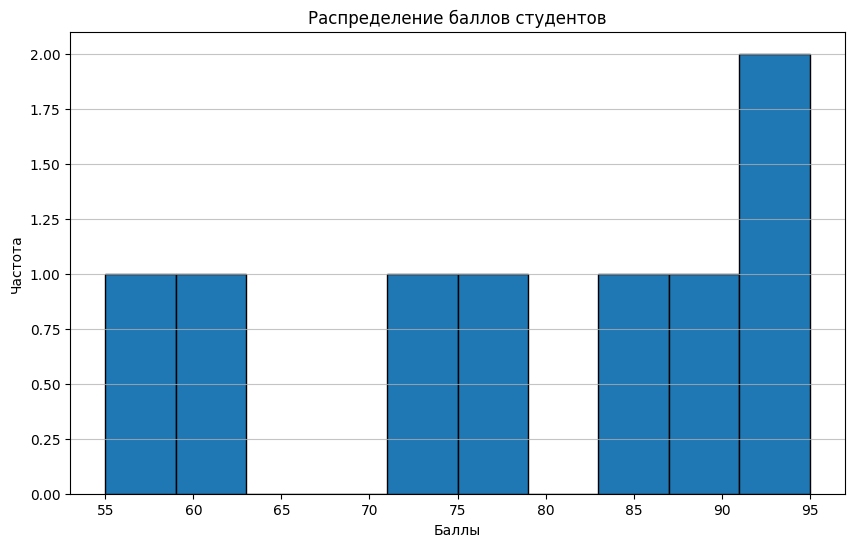

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=10, edgecolor='black')
plt.title('Распределение баллов студентов')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

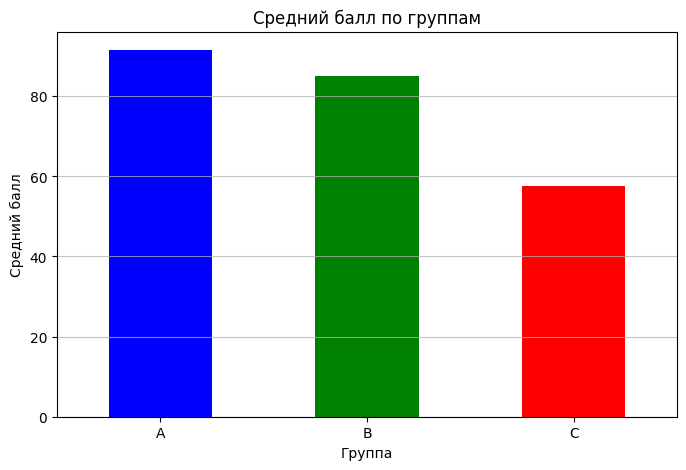

In [ ]:

average_score_by_group = df.groupby('Group')['Score'].mean()


plt.figure(figsize=(8, 5))
average_score_by_group.plot(kind='bar', color=['blue', 'green','red'])
plt.title('Средний балл по группам') # Set the title
plt.xlabel('Группа') # Set the x-axis label
plt.ylabel('Средний балл') # Set the y-axis label
plt.xticks(rotation=0) # Rotate x-axis labels if needed (0 for no rotation)
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability (optional)
plt.show() # Display the plot